# Table of Contents

1. [Data Analysis](#analysis)
2. [Supervised Method](#sup)
    2.  [Linear Regression](#lin)
    2.  [Polynomial Regression](#pol)
    2.  [Logistic Regression](log#)
3. [Unsupervised Method](#uns)
    3.  [Hierarchical Clustering](#hie)
    3.  [Agglomerative Clustering](#agg)
    3.  [K-means Clustering](#k-m)
4. [Transform data by 2D Principle component analysis - Visualise data](#pca)

<a id="analysis"></a>
# 1 Data Analysis


In [3]:
# Import libraries 
import numpy as np    # Implemennts milti-dimensional array and matrices
import pandas as pd  # for data manipulation and analysis
import seaborn as sns   # provides a high-level interface for drawing attractive and informative statistical graphics
import matplotlib.pyplot as plt   # Python 2D plotting library and it's numerical mathematics extension NumPy

In [4]:
# Import dataset Car Sale Advertisments from https://www.kaggle.com/antfarol/car-sale-advertisements
cars = pd.read_csv("C://Users//Angom//Documents//Semester1//Big data - CS982//project//car_ad.csv", encoding = "ISO-8859-1") 
# change to directory that collect file car_ad.csv

FileNotFoundError: File b'C://Users//Angom//Documents//Semester1//Big data - CS982//project//car_ad.csv' does not exist

In [83]:
# To show 7 first order of dataset
cars.head(7)

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN
5,Nissan,16600.0,crossover,83,2.0,Petrol,yes,2013,X-Trail,full
6,Honda,6500.0,sedan,199,2.0,Petrol,yes,2003,Accord,front


In [28]:
cars.shape # Print shape of the number of rows and column of or dataframe

(9576, 10)

In [29]:
cars.describe()  # To describe data, shows number of counts, mean, std, min, max,... (show statistic of data)

C:\Users\Angom\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4269: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


,price,mileage,engV,year
count,9576.000000,9576.000000,9142.000000,9576.000000
mean,15633.317316,138.862364,2.646344,2006.605994
std,24106.523436,98.629754,5.927699,7.067924
min,0.000000,0.000000,0.100000,1953.000000
25%,4999.000000,70.000000,NaN,2004.000000
50%,9200.000000,128.000000,NaN,2008.000000
75%,16700.000000,194.000000,NaN,2012.000000
max,547800.000000,999.000000,99.990000,2016.000000


In [30]:
cars.info()  # To give Number of columns, Index, Datatype and Memory information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 10 columns):
car             9576 non-null object
price           9576 non-null float64
body            9576 non-null object
mileage         9576 non-null int64
engV            9142 non-null float64
engType         9576 non-null object
registration    9576 non-null object
year            9576 non-null int64
model           9576 non-null object
drive           9065 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 748.2+ KB


In [31]:
cars.isnull().sum()  # To find 'NaN' in data (find noise)

car               0
price             0
body              0
mileage           0
engV            434
engType           0
registration      0
year              0
model             0
drive           511
dtype: int64

In [32]:
cars[cars == 0].count()  # To find and count values that equal to 0

car               0
price           267
body              0
mileage         348
engV              0
engType           0
registration      0
year              0
model             0
drive             0
dtype: int64

In [33]:
# data pre-processing
cars = cars.drop(cars[cars.price <= 0].index) # delete price = 0
cars = cars.drop(cars[cars.mileage <= 0].index) # delete milaege = 0
cars = cars.dropna() # delete all NaN value

cars[cars == 0].count() # To check no 0 in dataset

car             0
price           0
body            0
mileage         0
engV            0
engType         0
registration    0
year            0
model           0
drive           0
dtype: int64

In [34]:
cars.isnull().sum() # To check no 'NAN' in dataset

car             0
price           0
body            0
mileage         0
engV            0
engType         0
registration    0
year            0
model           0
drive           0
dtype: int64

In [35]:
cars.shape # To check final number of rows and columns

(8213, 10)

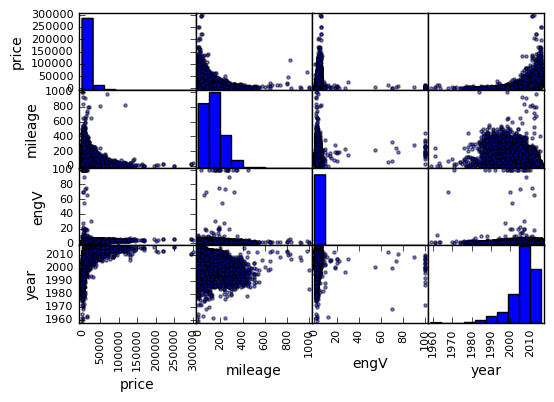

In [36]:
from pandas.tools.plotting import scatter_matrix  # Import scatter_matrix
scatter_matrix(cars) # plot scatter of dataset
plt.show()

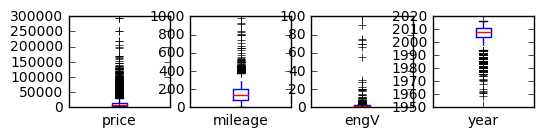

In [37]:
cars.plot(kind='box', subplots=True, layout=(3,4))  # plot boxplot of dataset
plt.show()

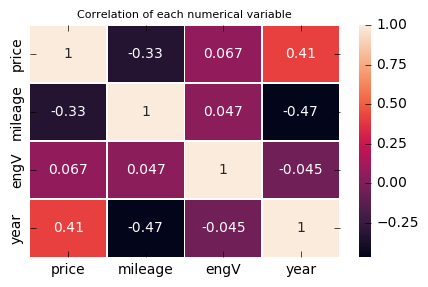

In [38]:
# Plot a heatmap showing the correlation between each numerical variable

plt.figure(figsize=(5,3))      #  fix size of chart
corr = cars.corr()      #  find correlation
sns.heatmap(corr,annot=True, linewidths=.5)     #  plot heatmap
plt.title('Correlation of each numerical variable', size = 8)
plt.show()

In [39]:
cars_body = cars.groupby("body")     #   To group dataset by variable 'body'
cars_body.describe()

engV      mileage          price         year
body                                                                 
crossover count  1699.000000  1699.000000    1699.000000  1699.000000
          mean      3.163025   113.490288   26847.014615  2008.776339
          std       4.252475    76.527348   23490.287564     5.040414
          min       1.200000     1.000000     850.000000  1972.000000
          25%       2.000000    63.000000   12999.000000  2007.000000
          50%       3.000000   105.000000   19200.000000  2009.000000
          75%       3.500000   152.000000   33000.000000  2012.000000
          max      99.990000   980.000000  219900.000000  2016.000000
hatch     count  1067.000000  1067.000000    1067.000000  1067.000000
          mean      1.678135   118.958763    7976.867192  2005.977507
          std       3.746510    91.435037    8226.195576     7.300149
          min       0.110000     1.000000     600.000000  1964.000000
          25%       1.300000    62.000000    3700.000000  2004.000000
          50%       1.500000   100.000000    6800.000000  2008.000000
          75%       1.600000   152.500000    9700.000000  2011.000000
          max      99.990000   920.000000  117777.000000  2016.000000
other     count   677.000000   677.000000     677.000000   677.000000
          mean      2.590059   143.556869   18553.806990  2006.206795
          std       3.955707    99.685608   27251.157142     6.773715
          min       0.600000     1.000000     800.000000  1961.000000
          25%       1.600000    74.000000    6500.000000  2004.000000
          50%       2.000000   130.000000   10700.000000  2007.000000
          75%       2.800000   200.000000   19900.000000  2011.000000
          max      99.990000   650.000000  300000.000000  2016.000000
sedan     count  3209.000000  3209.000000    3209.000000  3209.000000
          mean      2.619470   153.789966   11605.206264  2004.784356
          std       6.274369    98.712267   15776.722167     7.608909
          min       0.100000     1.000000     259.350000  1959.000000
          25%       1.600000    85.000000    4000.000000  2001.000000
          50%       2.000000   138.000000    7899.000000  2007.000000
          75%       2.500000   210.000000   12900.000000  2010.000000
          max      99.990000   999.000000  295000.000000  2016.000000
vagon     count   641.000000   641.000000     641.000000   641.000000
          mean      2.297395   179.822153    8829.749813  2005.340094
          std       5.621687    84.394440    7019.307950     6.119112
          min       0.650000     1.000000     815.100000  1976.000000
          25%       1.500000   122.000000    3799.000000  2001.000000
          50%       1.800000   178.000000    7400.000000  2006.000000
          75%       2.000000   237.000000   11200.000000  2011.000000
          max      99.990000   504.000000   62000.000000  2016.000000
van       count   920.000000   920.000000     920.000000   920.000000
          mean      2.426109   193.915217   10254.484049  2007.067391
          std       5.933630    92.232753   12337.051728     4.950442
          min       1.000000     1.000000     750.000000  1985.000000
          25%       1.600000   141.000000    6000.000000  2004.000000
          50%       2.000000   185.000000    8000.000000  2008.000000
          75%       2.200000   240.500000   10900.000000  2011.000000
          max      99.990000   999.000000  200000.000000  2016.000000

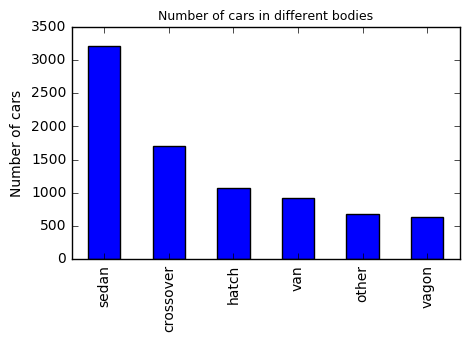

In [40]:
plt.figure(figsize=(5,3))   #  fix size of chart
cars['body'].value_counts().sort_values(ascending=None).plot.bar()   # plot bar chart (X-axis is body and Y-axis is number of cars)
plt.title('Number of cars in different bodies', size = 9)   #  fill the name of title of chart and fix size
plt.ylabel('Number of cars')   #  fill the name of Y-axis of chart and fix size
plt.show()  # show the chart

In [41]:
cars_year = cars.groupby("year")    #  group data by variable 'year'
cars_year.price.agg(["mean","median","max","min"])  # show mean, median, max and min 

,mean,median,max,min
year,,,,
1959,259.350000,259.35,259.35,259.350
1961,2250.000000,2250.00,4000.00,500.000
1962,15000.000000,15000.00,15000.00,15000.000
1963,15000.000000,15000.00,15000.00,15000.000
1964,1500.000000,1500.00,1500.00,1500.000
1968,2000.000000,2000.00,2000.00,2000.000
1970,4000.000000,4000.00,4000.00,4000.000
1971,1675.000000,1675.00,2800.00,550.000
1972,5500.000000,5500.00,5500.00,5500.000


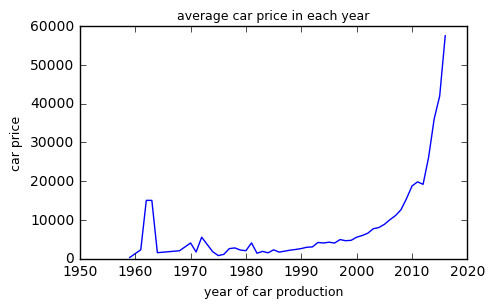

In [42]:
plt.figure(figsize=(5,3))    # Fix size of graph
plt.plot(cars_year.price.mean())   # plot average car price in each year
plt.title('average car price in each year' , size = 9)  # Add title
plt.xlabel('year of car production', size = 9)    # Add name of X-axis
plt.ylabel('car price', size = 9)  # Add name of Y-axis
plt.show()

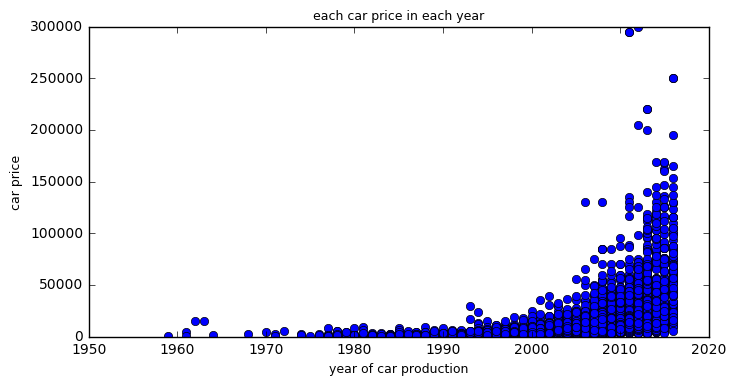

In [43]:
plt.figure(figsize=(8,4))   # Fix size of graph
plt.plot(cars.year, cars.price, 'o')  # plot year Vs price

# Add labels
plt.title('each car price in each year' , size = 9)
plt.xlabel('year of car production', size = 9)
plt.ylabel('car price', size = 9)
plt.show()

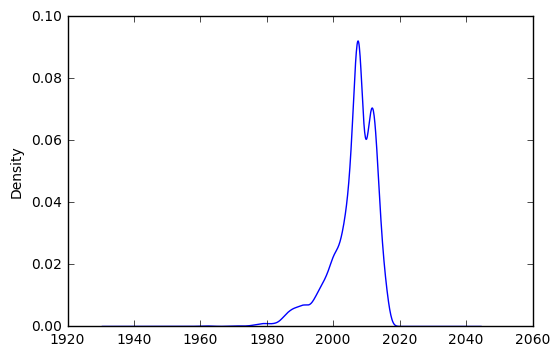

In [44]:
carsyear = cars["year"]  # create new dataframe name carsyear to collect column 'Year'
carsyear.plot.density()   # plot density of year
plt.show()

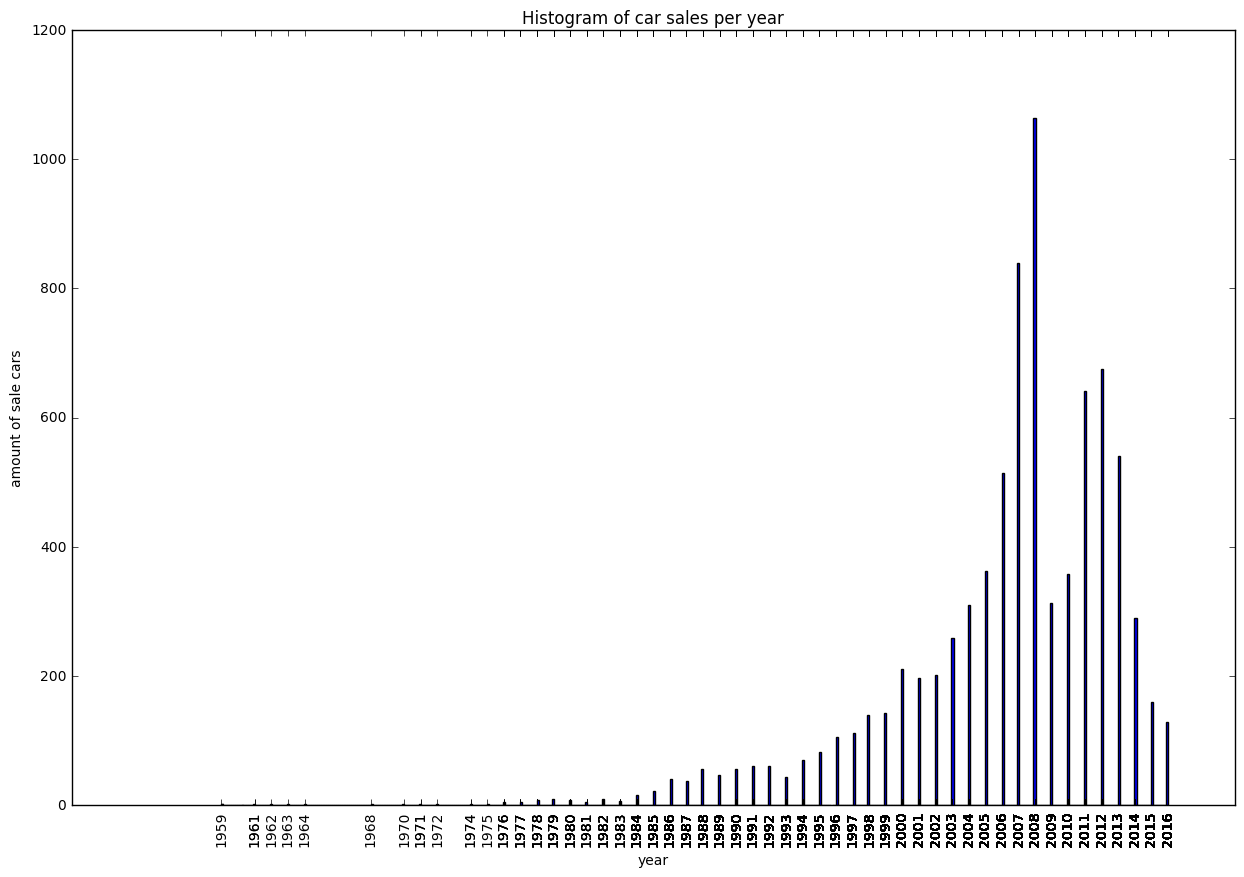

In [45]:
# matplotlib histogram
plt.figure(figsize=(15,10))
plt.hist(cars['year'], color = 'blue', edgecolor = 'black', bins = int(450))

# plot by seaborn
#sns.distplot(cars['year'], hist=True, kde=False, bins=int(450), color = 'blue', hist_kws={'edgecolor':'black'})

# Add labels
plt.xticks(cars.year)  #  show all year in x-axis
plt.xticks(rotation=90) # rotate the X axis
plt.title('Histogram of car sales per year')
plt.xlabel('year')
plt.ylabel('amount of sale cars')
plt.show()

In [46]:
cars.nlargest(5, ['price', 'mileage'])  #  sort the most 5 expensive cars

,car,price,body,mileage,engV,engType,registration,year,model,drive
5849,Mercedes-Benz,300000.0,other,37,5.0,Petrol,yes,2012,G 500,full
1891,Mercedes-Benz,295000.0,sedan,29,6.0,Petrol,yes,2011,S 600,rear
2165,Mercedes-Benz,295000.0,sedan,29,6.0,Petrol,yes,2011,S-Guard,rear
564,Mercedes-Benz,250000.0,other,6,5.5,Petrol,yes,2016,S 63 AMG,full
567,Mercedes-Benz,249999.0,other,3,5.5,Petrol,yes,2016,S 63 AMG,full


In [47]:
cars.nsmallest(5, ['price', 'mileage'])  #  sort the most 5 cheapest cars

,car,price,body,mileage,engV,engType,registration,year,model,drive
5010,GAZ,259.35,sedan,1,2.4,Other,yes,1959,21,rear
6457,Moskvich-AZLK,280.00,sedan,99,1.5,Petrol,yes,1976,2140,rear
8252,ZAZ,370.50,sedan,3,1.1,Petrol,yes,1989,968,rear
7149,Moskvich-AZLK,400.00,sedan,1,10.0,Petrol,yes,1985,2140,rear
8736,VAZ,400.00,sedan,10,1.1,Petrol,yes,1982,2101,rear


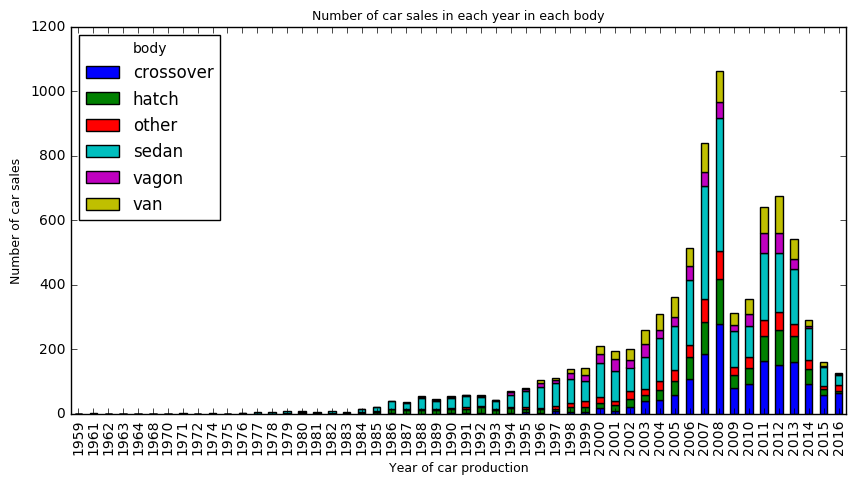

In [48]:
# Plot a stacked bar chart showing the number of car sales in each year in each body
cars_gr = cars.groupby(['year','body'])  #  group by production year and body of car
cars_gr.size().unstack().plot(kind="bar", stacked=True, figsize=(10,5))   # plot stack
ax = plt.gca()

# add labels
plt.xlabel('Year of car production', size = 9)
plt.ylabel('Number of car sales', size = 9)
plt.title('Number of car sales in each year in each body', size = 9)
plt.show()

In [49]:
# group data by car brands
brand_gr = cars.groupby(["car"])
brand_gr.mean()

,price,mileage,engV,year
car,,,,
Acura,18554.384615,112.076923,3.384615,2007.846154
Alfa Romeo,9040.818182,195.363636,1.836364,2004.000000
Aro,3600.000000,43.000000,1.400000,1992.000000
Aston Martin,105000.000000,22.333333,6.000000,2009.666667
Audi,17667.773485,185.361111,3.103965,2004.623737
BMW,22337.026936,178.693603,3.076077,2004.695286
BYD,8114.142857,49.428571,1.785714,2011.142857
Bentley,75672.777778,136.555556,6.000000,2008.000000
Bogdan,4950.000000,220.000000,1.600000,2014.500000


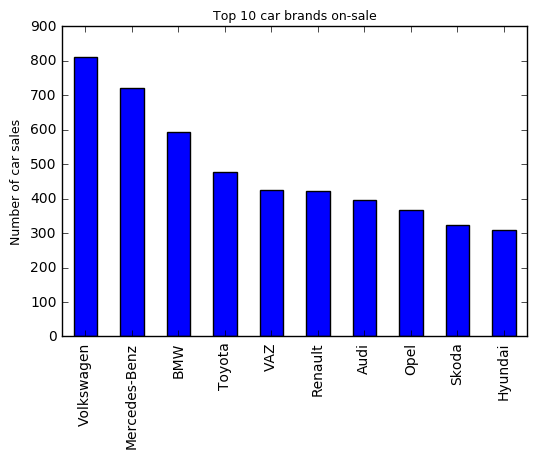

In [50]:
# plot top 10 car brands was selling

cars.car.value_counts().head(10).plot.bar()
plt.title("Top 10 car brands on-sale", size = 9)
plt.ylabel('Number of car sales', size = 9)
plt.show()

In [51]:
cars.car.value_counts().head(10)  #  look up the number of Top 10 car brands on-sale

Volkswagen       810
Mercedes-Benz    720
BMW              594
Toyota           478
VAZ              426
Renault          422
Audi             396
Opel             367
Skoda            325
Hyundai          310
Name: car, dtype: int64

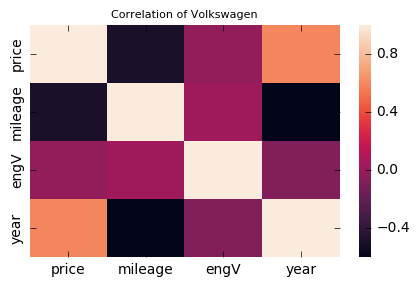

In [52]:
# plot correlation of Volkswagen
volk = cars[cars.car == 'Volkswagen']
plt.figure(figsize=(5,3))
corr_volk = volk.corr()
sns.heatmap(corr_volk)
plt.title('Correlation of Volkswagen', size = 8)
plt.show()

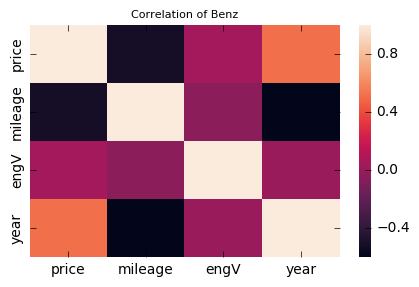

In [53]:
# plot correlation of Mercedes-Benz
benz = cars[cars.car == 'Mercedes-Benz']
plt.figure(figsize=(5,3))
corr_benz = benz.corr()
sns.heatmap(corr_benz)
plt.title('Correlation of Benz', size = 8)
plt.show()

In [54]:
data_cars = cars[:]   #  create new dataframe that same as dataset - I dont want to change values in the real dataset
for i in data_cars.columns:    #  for loop  for i = 0 to the number of columns in data_cars 
    if data_cars[i].dtype == 'object':      #  if data type is an 'object'
        label = preprocessing.LabelEncoder()   # data pre-processing (transform non-numerical labels to numerical labels.)
        label.fit(list(data_cars[i].values))   
        data_cars[i] = label.transform(list(data_cars[i].values))  #  put a new value to data_cars 

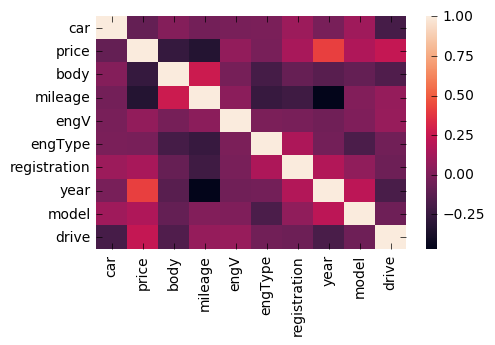

In [55]:
# Plot a heatmap showing the correlation between all variables

plt.figure(figsize=(5,3))   # fix size of chart
corr_data = data_cars.corr()  # compute correlation of data_cars
sns.heatmap(corr_data)  #  plot heat map
plt.show()

<a id="sup"></a>
# 2. Supervised method


In [56]:
import sklearn   #  import tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction
from sklearn import model_selection, preprocessing  # import model selection and preprocessing
from sklearn.linear_model import LinearRegression
from sklearn import metrics   # evaluate prediction error of each techniques.
from sklearn.metrics import mean_squared_error, r2_score   # import evaluated performance tools (RMSE and R^2)
from sklearn.model_selection import train_test_split   # to divide dataset into train and test set

<a id="lin"></a>
## 2.1Linear Regression

In [57]:
Y_regress = data_cars.values[:,1]     # segment price as output variables
X_regress = data_cars.values[:,7:8]   # segment year as input variables

In [58]:
# Segment the data in a training and test set with a 70/30 split
X_train_regress, X_test_regress, Y_train_regress, Y_test_regress = sklearn.model_selection.train_test_split(X_regress, Y_regress, test_size=0.30)

In [59]:
li_regres = LinearRegression()   # call linear regression
li_regres.fit(X_train_regress, Y_train_regress) #training the linear regression algorithm

print(li_regres.intercept_)   #To return the intercept
print(li_regres.coef_)   #For return the slope

-2322792.05583
[ 1165.06431403]


In [60]:
Y_pred = li_regres.predict(X_test_regress)   # predict outcome(price) of test set from the model
Y_train_pred = li_regres.predict(X_train_regress)  # predict outcome(price) of training set from the model

In [61]:
compare_value = pd.DataFrame({'Actual': Y_test_regress.flatten(), 'Predicted': Y_pred.flatten()})   #compare Actual and Predicted value
print(compare_value)   # print compare_value

           Actual     Predicted
0      7000.00000  16657.086740
1     29000.00000  20152.279682
2      1950.00000  13161.893798
3     10000.00000  13161.893798
4      1185.60000 -10139.392482
5     14500.00000  11996.829484
6     43000.00000  24812.536938
7      4800.00000   9666.700856
8     28700.00000  21317.343996
9      2600.00000   7336.572228
10     5700.00000  15492.022426
11     3900.00000  11996.829484
12     4400.00000  11996.829484
13    10499.00000  21317.343996
14    20700.00000  23647.472624
15     3500.00000   6171.507914
16    15300.00000  14326.958112
17     8900.00000  16657.086740
18     3300.00000   7336.572228
19    14500.00000  18987.215368
20    14900.00000  21317.343996
21     3950.00000  18987.215368
22     8300.00000  23647.472624
23     8500.00000  13161.893798
24    28900.00000  22482.408310
25    13100.00000  10831.765170
26    11777.00000   8501.636542
27     4290.00000  13161.893798
28    19200.00000  13161.893798
29    17999.00000  15492.022426
...     

In [62]:
# evaluate performance of the model
rmse_test = mean_squared_error(Y_test_regress, Y_pred)  # calculate RMSE from predicted outcome of test set
r2_test = r2_score(Y_test_regress, Y_pred)   # calculate R^2 from predicted outcome of test set
 
rmse_train = mean_squared_error(Y_train_regress, Y_train_pred)  # calculate RMSE from predicted outcome of training set
r2_train = r2_score(Y_train_regress, Y_train_pred)  # calculate R^2 from predicted outcome of training set

# printing values
print('Root mean squared error of training set: ', rmse_train)
print('R2 score of training set: ', r2_train)
print('Root mean squared error of test set: ', rmse_test)
print('R2 score of test set: ', r2_test)

Root mean squared error of training set:  291149339.307
R2 score of training set:  0.174177470196
Root mean squared error of test set:  283863024.63
R2 score of test set:  0.161016211295


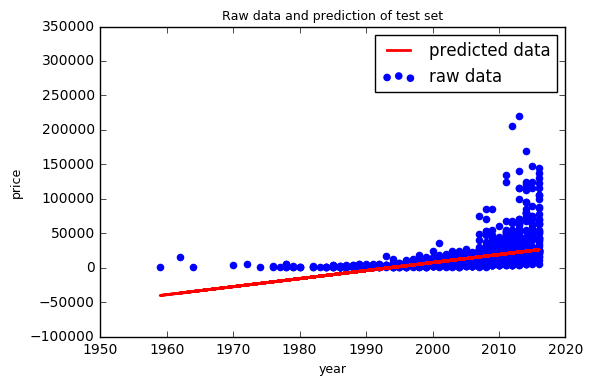

In [63]:
plt.scatter(X_test_regress, Y_test_regress,  color='blue', label='raw data')  # plot scatter of test set between X and Y
plt.plot(X_test_regress, Y_pred, color='red', linewidth = 2, label='predicted data')  # plot Y predicted from test set.

# Add labels
plt.title("Raw data and prediction of test set", size = 9)
plt.ylabel('price', size = 9)
plt.xlabel('year', size = 9)
plt.legend()
plt.show()

<a id="pol"></a>
## 2.2 Polynomial regression


In [64]:
from sklearn.preprocessing import PolynomialFeatures  # import polynomial regression tool

poly = PolynomialFeatures(degree = 2)   # set the polynomial degress
X_poly = poly.fit_transform(X_train_regress)   # add polynomial to X_train
X_poly_test = poly.fit_transform(X_test_regress)   # add polynomial to X_test

poly.fit(X_poly, Y_train_regress)   #training the polynomial algorithm
lin2 = LinearRegression()   # call linear regression
lin2.fit(X_poly, Y_train_regress)   # train the algorithm


print(lin2.intercept_) #To return the intercept
print(lin2.coef_) #For return the slope

253806466.611
[  0.00000000e+00  -2.54805751e+05   6.39520073e+01]


In [65]:
Y_poly_train = lin2.predict(X_poly)  # predict outcome(price) of training set from the model
Y_poly_test = lin2.predict(X_poly_test)  # predict outcome(price) of test set from the model

In [66]:
# model evaluation
rmse_test = mean_squared_error(Y_test_regress, Y_poly_test)
r2_test = r2_score(Y_test_regress, Y_poly_test)

rmse_train = mean_squared_error(Y_train_regress, Y_poly_train)
r2_train = r2_score(Y_train_regress, Y_poly_train)

# printing values
print('Root mean squared error of training set: ', rmse_train)
print('R2 score of training set: ', r2_train)
print('Root mean squared error of test set: ', rmse_test)
print('R2 score of test set: ', r2_test)

Root mean squared error of training set:  266599191.406
R2 score of training set:  0.243812061484
Root mean squared error of test set:  261504932.445
R2 score of test set:  0.22709764939


<a id="log"></a>
## 2.3 Logistic regression


In [67]:
Y = data_cars.values[:,2]  # select outcomes as body type 
X = data_cars.values[:,0:9] # select input variables

In [68]:
# Logistic regression
from sklearn.linear_model import LogisticRegression  # import logistic regression
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.30)  # Segment the data in a training and test set with a 70/30 split
lm = LogisticRegression()  # call logistic regression algorithm
lm.fit(X_train, Y_train)   # train the algorithm
lm.predict_proba(X_test)  # predict outcome from probability of input variables X
predicted = lm.predict(X_test)  # predict outcome from  probability of input variables X
print(metrics.classification_report(Y_test, predicted))  # print  precision, recall, f1-score and support
print(metrics.confusion_matrix(Y_test, predicted))  # print confusion matrix

             precision    recall  f1-score   support

        0.0       0.98      0.99      0.98       506
        1.0       0.96      0.82      0.88       328
        2.0       0.90      0.09      0.16       210
        3.0       0.70      1.00      0.82       965
        4.0       0.00      0.00      0.00       175
        5.0       0.99      0.97      0.98       280

avg / total       0.79      0.82      0.77      2464

[[499   7   0   0   0   0]
 [ 10 269   0  49   0   0]
 [  0   5  19 186   0   0]
 [  0   0   2 963   0   0]
 [  0   0   0 173   0   2]
 [  0   0   0   8   0 272]]


C:\Users\Angom\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


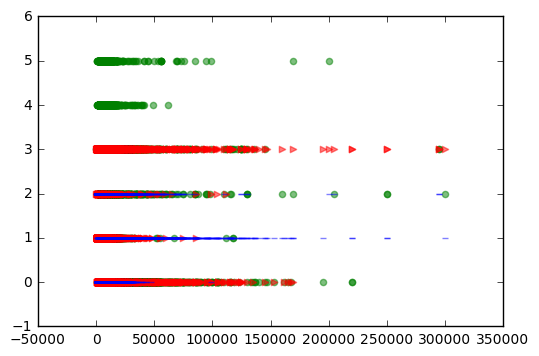

In [69]:
# Plot a single scatter plot
plt.scatter(data_cars['price'], data_cars['body'],color='g', marker='o', alpha=0.5)
plt.scatter(data_cars['price'], data_cars['engType'], color='r', marker='>', alpha=0.5)
plt.scatter(data_cars['price'], data_cars['drive'], color='b',marker='_', alpha=0.5)
plt.show()

<a id="uns"></a>
# 3. Unsupervised method


In [70]:
from sklearn import cluster   # import clustering tool
from sklearn.preprocessing import scale  # import data normalise tool

In [71]:
data_cars = cars[:]   #  create new dataframe that same as dataset - I dont want to change values in the real dataset

for i in data_cars.columns:    #  for loop  for i = 0 to the number of columns in data_cars 
    if data_cars[i].dtype == 'object':      #  if data type is an 'object'
        label = preprocessing.LabelEncoder()   # data pre-processing (transform non-numerical labels to numerical labels.)
        label.fit(list(data_cars[i].values))   
        data_cars[i] = label.transform(list(data_cars[i].values))  #  put a new value to data_cars 

<a id = "hie"></a>
## 3.1 hierarchical clustering


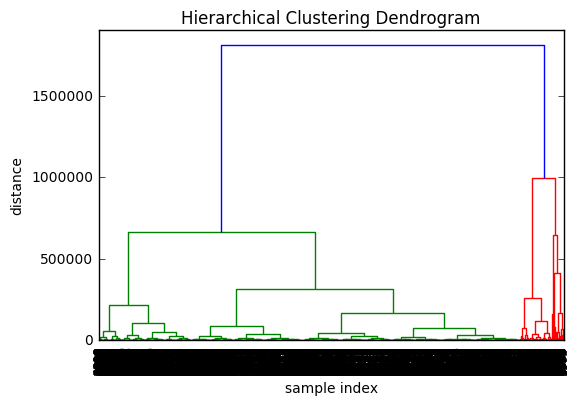

In [72]:
from scipy.cluster.hierarchy import dendrogram, linkage  # import dendrogram, linkage
plt.figure(figsize=(10,8))  # fix size chart
model_c = linkage(data_cars, 'ward')  # indicate linkage 

# plot dendrogram
plt.figure()     
plt.title('Hierarchical Clustering Dendrogram')  # fill title
plt.xlabel('sample index')  # fill x-axis name
plt.ylabel('distance')    # fill y-axis name
dendrogram(model_c,truncate_mode=None, leaf_rotation=90., leaf_font_size=8., labels=data_cars.index)    # plot dendrogram
plt.show()

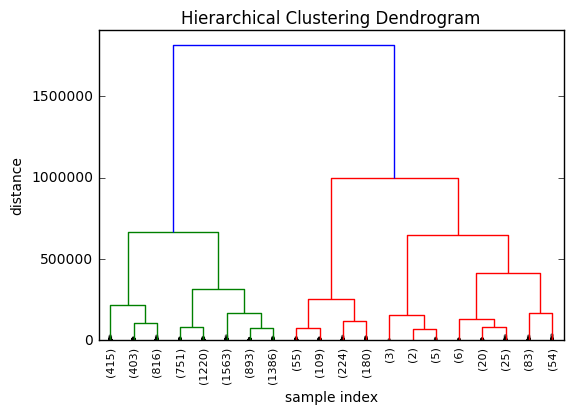

In [73]:
# plot Dendrogram -  # set truncate_mode = 'lastp' 
plt.figure(figsize=(10,8))
model_c = linkage(data_cars, 'ward')
plt.figure()
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(model_c, truncate_mode='lastp', p=20, leaf_rotation=90., leaf_font_size=8., show_contracted=True)
plt.show()

In [74]:
Y = data_cars.values[:,2]   # select data into Y varaible
X = data_cars.values[:,0:10]    # select data into X varaible

#X = scale(X) # normalise data to speed up the algorithm
n_samples, n_features = X.shape  # collect shape of X
n_balance = len(np.unique(Y))  # collect number of different type of Y

2 0.790643854724
3 0.733606309962
4 0.611262284269
5 0.61430867342
6 0.615457680688
7 0.503504552946
8 0.50040014179
9 0.517016025684
10 0.507478858223
11 0.508379363804
12 0.508431566238
13 0.508786375904
14 0.510892866955
15 0.504868990111
16 0.484081454504
17 0.483481208392
18 0.472835094101
19 0.472715526704


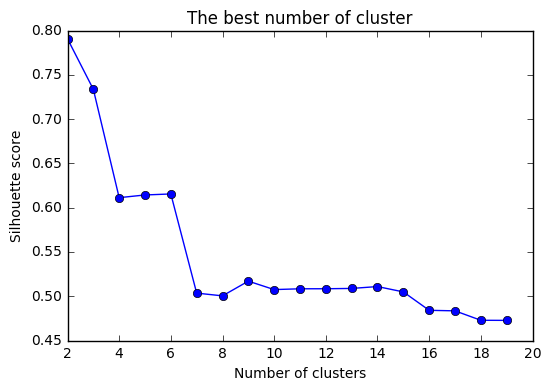

In [75]:
#check the best cluster of Agglomerative clustering
sil = []  # creat new variables
for k in range(2, 20):
    model = cluster.AgglomerativeClustering(n_clusters=k, linkage="ward", affinity="euclidean")  
    model.fit(X)
    sil.append(metrics.silhouette_score(X, model.labels_)) # collect silhouette_score in sil in every iteration
    print(k, metrics.silhouette_score(X, model.labels_))
# plot
plt.plot(range(2, 20), sil, marker='o')
plt.title('The best number of cluster')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

<a id = "agg"></a>
## 3.2 Agglomerative Clustering


In [77]:
# use Agglomerative clustering  with n_clusters=n_balance, linkage="average", affinity="cosine"
model = cluster.AgglomerativeClustering(n_clusters=n_balance, linkage="average", affinity="cosine")
model.fit(X)
print(model.labels_)
print("Silhouette score", metrics.silhouette_score(X, model.labels_))
print("Completeness score", metrics.completeness_score(Y, model.labels_))
print("Homogeneity score", metrics.homogeneity_score(Y, model.labels_))

[4 4 4 ..., 4 4 4]
Silhouette score -0.0563356143557
Completeness score 0.0713441553509
Homogeneity score 0.0326691798078


<a id = "k-m"></a>
## 3.3 K-means clustering


In [78]:
# use k-mean with n_clusters=n_balance
kmeans = cluster.KMeans(n_clusters=n_balance)
kmeans.fit(X)
print("Silhouette score", metrics.silhouette_score(X, kmeans.labels_))
print("Completeness score", metrics.completeness_score(Y, kmeans.labels_))
print("Homogeneity score", metrics.homogeneity_score(Y, kmeans.labels_))

Silhouette score 0.583199711101
Completeness score 0.121638653112
Homogeneity score 0.0780455647263


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


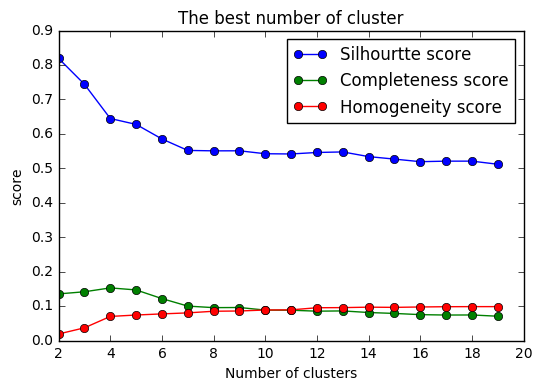

In [79]:
#check the best cluster of k-mean clustering
sil_k = []
com_k = []
hom_k = []
for k in range(2,20):
    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(X)
    print(k)
    sil_k.append(metrics.silhouette_score(X, kmeans.labels_))   #   collect silhouette score in sil_k in every iteration
    com_k.append(metrics.completeness_score(Y, kmeans.labels_))   #   collect completeness score in com_k in every iteration
    hom_k.append(metrics.homogeneity_score(Y, kmeans.labels_))   # collect homogeneity score in hom_k in every iteration
    #print("Silhouette score", metrics.silhouette_score(X, kmeans.labels_))
    #print("Completeness score", metrics.completeness_score(Y, kmeans.labels_))
    #print("Homogeneity score", metrics.homogeneity_score(Y, kmeans.labels_))
# plot completeness score, homogeneity score, silhouette score in a time
plt.plot(range(2, 20), sil_k, marker='o', label='Silhourtte score')
plt.plot(range(2, 20), com_k, marker='o', label='Completeness score')
plt.plot(range(2, 20), hom_k, marker='o', label='Homogeneity score')
plt.title('The best number of cluster')
plt.xlabel('Number of clusters')
plt.ylabel('score')
plt.legend()
plt.show()
    

<a id = "pca"></a>
# 4. Transform data by 2D Principle component analysis - Visualise data


In [80]:
# transformation PCA to data
from sklearn.decomposition import PCA   #  import PCA
pca = PCA(n_components=2)    # set PCA calue = 2
principalComponents = pca.fit_transform(X)  
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal_component_1', 'principal_component_2'])

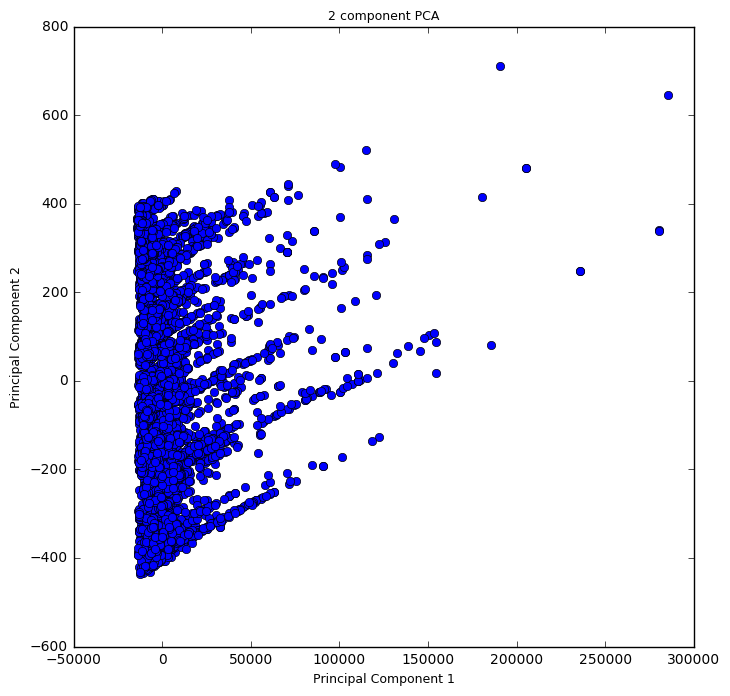

In [81]:
# plot PCA 2D
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', size = 9)
ax.set_ylabel('Principal Component 2', size = 9)
ax.set_title('2 component PCA', size = 9)
plt.plot(principalDf.principal_component_1, principalDf.principal_component_2, 'o')
plt.show()